### The Process definition

We have $Z_1, Z_2 \sim N(0, \sigma^2)$ and $\lambda \in \mathbb{R}$.

The process is stationary and gaussian. Meaning that it is strictly stationary too. 

$$
\begin{gather}
m_X (t) = 0 \\
K(s,t) = \sigma^2 \cos(\lambda (s-t))
\end{gather}
$$

In [3]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [17]:
z1, z2 = stats.norm.rvs(size=2)

t_span = np.linspace(0.0, np.pi, 200)

X = z1*np.cos(4*t_span) + z2*np.sin(4*t_span) #Considering lambda = 4.

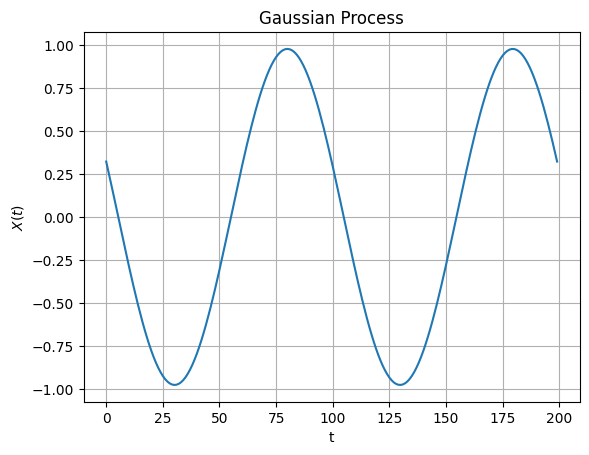

In [19]:
fig, ax = plt.subplots()

ax.plot(X)

ax.set(xlabel='t', ylabel='$X(t)$', title='Gaussian Process')
ax.grid()

plt.show()

Text(0.5, 1.0, 'Auto-correlation (acorr)')

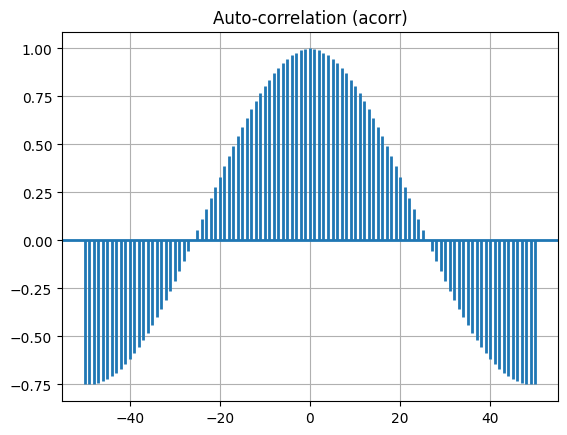

In [25]:
fig, ax = plt.subplots()

ax.acorr(X, usevlines=True, normed=True, maxlags=50, lw=2)
ax.grid(True)
ax.set_title('Auto-correlation (acorr)')

### A more interesting process

Here we have n random variables of the type $X_k(t)= Z_{k1} \cos(\lambda_k t) + Z_{k2}\sin(\lambda_k t)$. Here we have $Z_{k1}, Z_{k2}$ i.i.d with $N(0, \sigma^2_k)$. From this we get a sum of second order stationary processes.
$$
X(t)=\sum_{i}^n X_{i}(t)
$$

This gives us the following mean and covariance functions:
$$
\begin{gather}
m_X(t)=0\\
K(s,t) = \sum_{i=1}^n \sigma_i^2 \cos(\lambda_i (s-t))
\end{gather}
$$

In [43]:
Z_values = [stats.norm.rvs(size=2, scale = 7+1.5*np.random.randn(1)) for i in range(4)]
lambdas = [stats.gamma.rvs(2) for i in range(4)]

X_values = [[Z_values[i][0]*np.cos(lambdas[i]*t_span) + Z_values[i][1]*np.sin(lambdas[i]*t_span)] for i in range(4)]

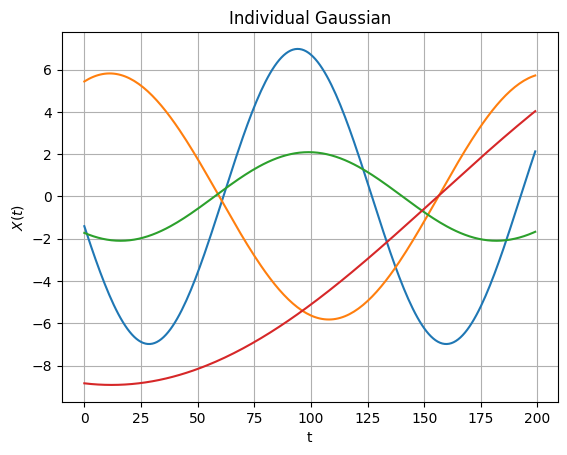

In [59]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(X_values[i][0])

ax.set(xlabel='t', ylabel='$X(t)$', title='Individual Gaussian')
ax.grid()

plt.show()

In [73]:
X_sum = X_values[0][0] + X_values[1][0]+X_values[2][0] + X_values[3][0]

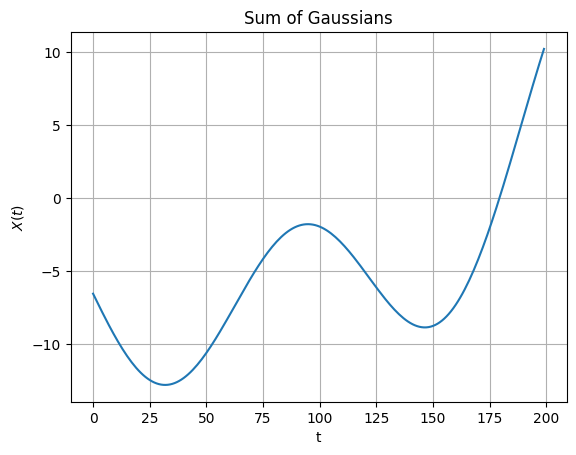

In [77]:
fig, ax = plt.subplots()

ax.plot(X_sum)

ax.set(xlabel='t', ylabel='$X(t)$', title='Sum of Gaussians')
ax.grid()

plt.show()